## Filling in Age Missing Values

In [1]:
%matplotlib inline

#Importing Modules
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Reading Data
df = pd.read_csv('../datasets/titanic/train.csv')

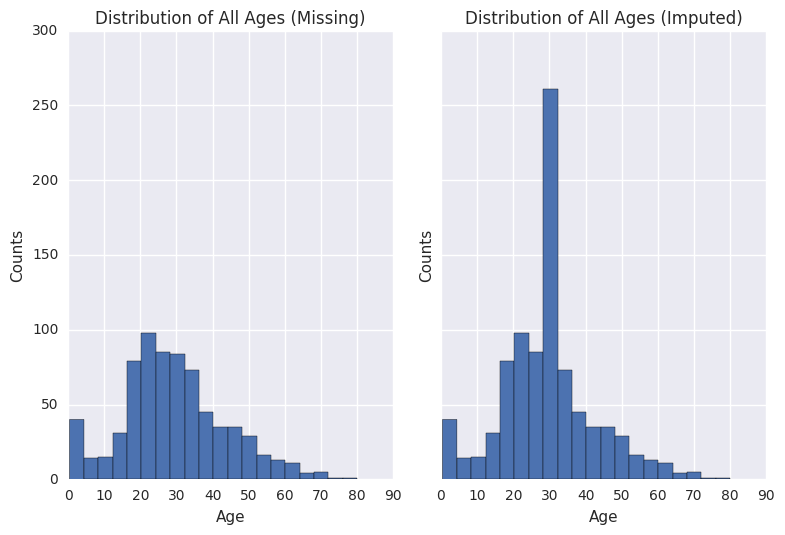

In [9]:
fig, axes = plt.subplots(1,2,sharey=True)

sns.set_style("white")

df['Age'].hist(bins=20,ax=axes[0])
axes[0].set_title('Distribution of All Ages (Missing)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Counts')

df['Age'].fillna(df.Age.mean(),inplace=True)
df['Age'].hist(bins=20,ax=axes[1])
axes[1].set_title('Distribution of All Ages (Imputed)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Counts')
fig.tight_layout()



In [13]:
sns.set() #To reset seaborn styles

df = pd.read_csv('../datasets/titanic/train.csv')
df['title'] = 'other'
df.loc[['Master.' in n for n in df['Name']],'title'] = 'Master'
df.loc[['Miss.' in n for n in df['Name']],'title'] = 'Miss'
df.loc[['Mr.' in n for n in df['Name']],'title'] = 'Mr'
df.loc[['Mrs.' in n for n in df['Name']],'title'] = 'Mrs'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
df.groupby('title')['Age'].mean() #Mean age is different per title

title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

### Brief Aside - Subsetting Guide to loc, iloc, and ix

In [15]:
#use loc if you plan on indexing by the index label of a dataframe, e.g.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
#the left most column represents the index and so if you do df.loc[1] you will select the second row
#but say the index was like so:
df_copy = df.copy()
df_copy.index = pd.Index(df.index.values-1)
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
-1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
df_copy.loc[1]
#since the index of 1 correponds to the third row, loc will select the third row 

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
title                            Miss
Name: 1, dtype: object

In [18]:
#iloc will index on position (actual row number) starting with 0 for the first row regardless of index
df.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
title                                                        Mrs
Name: 1, dtype: object

In [19]:
df_copy.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
title                                                        Mrs
Name: 0, dtype: object

In [20]:
#ix defaults to behave like loc but falls back to iloc if a label is not in the index AND if the index contains 
#both strings and numerics in most cases, you will use loc and iloc more often than ix. ix is useful if you want to 
#index the rows by index label and columns by position 
df.ix[:3,:2]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1


In [21]:
df_copy.ix[:3,:2]

,PassengerId,Survived
-1,1,0
0,2,1
1,3,1
2,4,1
3,5,0


## Smarter Missing Value Imputation

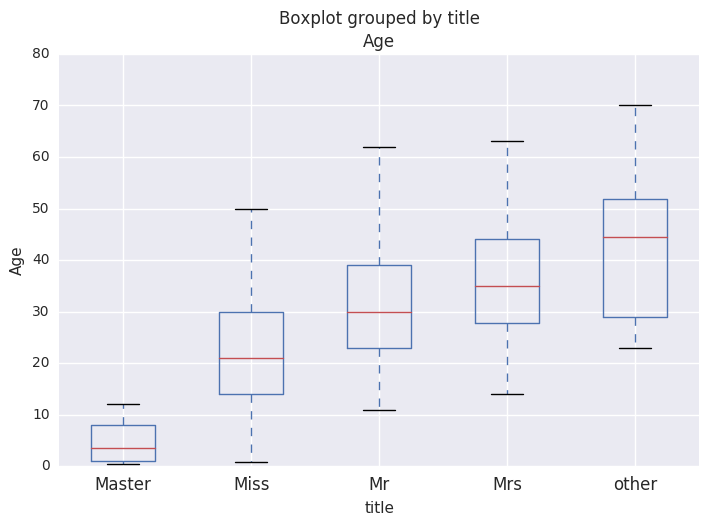

In [22]:
df.boxplot(column='Age',by='title') #Mean Age is different per title
plt.ylabel('Age')

In [23]:
#Transform performs operation per group and returns values to their original index
df['age_filled'] = df[['title','Age']].groupby('title').transform(lambda x: x.fillna(x.mean())) 
df[['title','Age','age_filled']].tail(20)

,title,Age,age_filled
871,Mrs,47.0,47.000000
872,Mr,33.0,33.000000
873,Mr,47.0,47.000000
874,Mrs,28.0,28.000000
875,Miss,15.0,15.000000
876,Mr,20.0,20.000000
877,Mr,19.0,19.000000
878,Mr,NaN,32.368090
879,Mrs,56.0,56.000000
880,Mrs,25.0,25.000000


In [24]:
df['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: title, dtype: int64

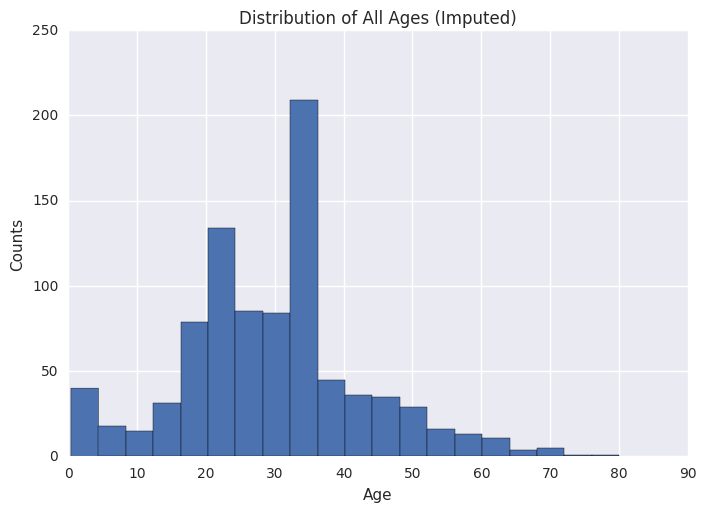

In [25]:
df['age_filled'].hist(bins=20)
plt.title('Distribution of All Ages (Imputed)')
plt.xlabel('Age')
plt.ylabel('Counts')

# Feature Engineering 

Feature engineering is the art of extracting information from your data that is otherwise not immediately apparent. Below are some examples:

1. Weekday from a date (e.g. 9/21/16 is a Wednesday)
1. Number of user web sessions (e.g. if each row of your data represents a user session, can aggregate by taking sum)
1. Number of "!" occurrences (e.g. a lot of "!"s in a string could signal excitement or extreme positive/negative sentiment)

Extracting this information often helps your model pick up hidden signals in your data. There is no hard rule on how to go about finding these things, but constant exposure to what others have done will give you a good amount of intuition for most problems. Domain knowledge can also help tremendously, as we'll see below.

## Feature engineering cabin location on the Titanic

It is known that cabin number can distinguish between port or starboard side of the Titanic. This is important because it seems that the "Women and children first" policy was implemented differently between the two sides. The starboard side had women and children prioritized before letting men on board while the port side ONLY allowed women and
children on board. Odd cabin numbers were on the starboard side and even cabin numbers were on the port side.

Cabin letter designates the deck on the titanic, starting from highest to lowest - A to G. 

In [26]:
df['Cabin'] 

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [27]:

df['cabin_side'] = 'Unknown'
df.loc[df['Cabin'].str[-1].isin(["1", "3", "5", "7", "9"]),'cabin_side'] = 'starboard'
df.loc[df['Cabin'].str[-1].isin(["2", "4", "6", "8", "0"]),'cabin_side'] = 'port'
df['cabin_side'].value_counts()


Unknown      691
port         110
starboard     90
Name: cabin_side, dtype: int64

In [28]:
df['deck'] = 'Unknown'
df.loc[df['Cabin'].notnull(),'deck'] = df['Cabin'].str[0]
df['deck'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: deck, dtype: int64

In [29]:
df[df['Cabin'].str[0]=='T'] #Why is there a T deck...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,age_filled,cabin_side,deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,45.0,Unknown,T


In [30]:
df.loc[df['deck'] == 'T','deck'] = "Unknown" #We can just set this to unknown (there is no T deck in the test set)

In [31]:
#Some cabins start with "F" followed by a space and then the actual deck letter
df['Cabin'][df.Cabin.notnull()].values

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77', 'E67',
       'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26',
       'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124', 'C91',
       'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10', 'C52',
       'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37', 'C30',
       'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73', 

In [32]:
pattern = "[A-Z]\s[A-Z]" #Any capital letter between A-Z followed by a whitespace followed by any letter between A-Z
mask = df['Cabin'].str.contains(pattern,na=False)
df.loc[mask,'Cabin']

75     F G73
128    F E69
699    F G63
715    F G73
Name: Cabin, dtype: object

In [33]:
df.loc[mask,'deck'] = df.loc[mask,'Cabin'].str[2]
df.deck.value_counts()

Unknown    688
C           59
B           47
D           33
E           33
A           15
F            9
G            7
Name: deck, dtype: int64

In [34]:
#If you also look closely, some people have multiple cabins assigned to them possibly indicating group tickets for the
#family.
#We can split these by whitespace and count them to make another variable called "number_in_group"
df['Cabin'].str.split()

0                  NaN
1                [C85]
2                  NaN
3               [C123]
4                  NaN
5                  NaN
6                [E46]
7                  NaN
8                  NaN
9                  NaN
10                [G6]
11              [C103]
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21               [D56]
22                 NaN
23                [A6]
24                 NaN
25                 NaN
26                 NaN
27     [C23, C25, C27]
28                 NaN
29                 NaN
            ...       
861                NaN
862              [D17]
863                NaN
864                NaN
865                NaN
866                NaN
867              [A24]
868                NaN
869                NaN
870                NaN
871              [D35]
872    [B51, B53, B55]
873        

In [35]:
df['num_in_group'] = df['Cabin'].str.split().map(lambda x: len(x) if type(x)!=float else 1)
df.loc[25:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,age_filled,cabin_side,deck,num_in_group
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Mrs,38.000000,Unknown,Unknown,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,32.368090,Unknown,Unknown,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,19.000000,starboard,C,3
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,21.773973,Unknown,Unknown,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr,32.368090,Unknown,Unknown,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,other,40.000000,Unknown,Unknown,1


# Regular Expressions

"Regular expressions" is simply character pattern matching. The reason we have this is so we can find specific string patterns in, say, a text document and then perform some operation on them (e.g. remove them, replace them, convert to upper case, etc.).

For example, if I want to find occurrences of a web url in a string, I can write something like:

http[s]?:

As a simple start to recognize the pattern "https:" or "http:". The ? symbol is a special symbol that means "match the preceding pattern 0 or 1 times".

A very helpful site to start learning from the ground up is regexone.com.

To put everything back into the Kaggle context, below is a modified version of code made by the1owl in a recent Home Depot competition (make sure you've done the regexone tutorial before proceeding!):

In [37]:
# Home Depot Data Set
import re #For regular expressions

#Remember to change your path appropriately!
hd = pd.read_csv("../datasets/home_depot/train.csv", encoding="ISO-8859-1")
hd.head()

FileNotFoundError: File b'../datasets/home_depot/train.csv' does not exist

In [36]:
hd.shape

(74067, 5)

In [39]:
#Used to convert spelled out numbers to the actual digits
strNum = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9} 

In [40]:
#And here's the list of regex! Credits to the1owl on Kaggle for compiling all of this

hd['cleaned_product_title'] = hd['product_title'].map(lambda s: re.sub(r"(\w)\.([A-Z])", r"\1 \2", s)) #Split words with a.A

In [41]:
hd.head()

,id,product_uid,product_title,search_term,relevance,cleaned_product_title
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Simpson Strong-Tie 12-Gauge Angle
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Simpson Strong-Tie 12-Gauge Angle
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Delta Vero 1-Handle Shower Only Faucet Trim Ki...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Delta Vero 1-Handle Shower Only Faucet Trim Ki...


In [42]:
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.lower())
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("  "," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace(",","")) #could be number / segment later
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("$"," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("?"," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("-"," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("//","/"))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("..","."))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace(" \\ "," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("."," . "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"(^\.|/)", r"", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"(\.|/)$", r"", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9])([a-z])", r"\1 \2", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([a-z])([0-9])", r"\1 \2", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace(" x "," xbi "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([a-z])( *)\.( *)([a-z])", r"\1 \4", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([a-z])( *)/( *)([a-z])", r"\1 \4", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("*"," xbi "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace(" by "," xbi "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("°"," degrees "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(degrees|degree)\.?", r"\1deg. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace(" v "," volts "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(volts|volt)\.?", r"\1volt. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(watts|watt)\.?", r"\1watt. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1amp. ", s))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("  "," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace(" . "," "))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: (" ").join([str(strNum[z]) if z in strNum else z for z in s.split(" ")]))
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.lower())
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("toliet","toilet")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("airconditioner","air conditioner")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("vinal","vinyl")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("vynal","vinyl")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("skill","skil")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("snowbl","snow bl")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("plexigla","plexi gla")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("rustoleum","rust-oleum")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("whirpool","whirlpool")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("whirlpoolga", "whirlpool ga")) 
hd['cleaned_product_title'] = hd['cleaned_product_title'].map(lambda s: s.replace("whirlpoolstainless","whirlpool stainless")) 

In [43]:
hd.head()

,id,product_uid,product_title,search_term,relevance,cleaned_product_title
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,simpson strong tie 12 gauge angle
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,simpson strong tie 12 gauge angle
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,behr premium textured deckover 1gal. #sc 141 t...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,delta vero 1 handle shower only faucet trim ki...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,delta vero 1 handle shower only faucet trim ki...


In order to better understand what each line does, let's break this down a bit:

s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s) #Split words with a.A

The prefix "r" represents that whatever comes next should be interpretted as a "raw string" 
Since python tries to be smart and convert, say, "\b" to mean "backspace" for you, this won't be converted correctly in regex.
Prefixing your regex patterns with "r" will tell python to hand over the "raw string" pattern for normal regex to work.

The "\1" code means "take the first regex group in parantheses and put it here". In this example, we put whatever valid word character
"(\w)" captures into the \1 spot and whatever capital letter "([A-Z])" catures into the \2 spot.


In [46]:
pattern = r"(\w)\.([A-Z])"
matches = hd.product_title.str.contains(pattern)
hd.product_title.iloc[np.where(matches)]


/Users/jerrychen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


709      U.S. Ceramic Tile Bright Snow White 3/4 in. x ...
710      U.S. Ceramic Tile Bright Snow White 3/4 in. x ...
2188     Homewerks Worldwide 3/8 in. O.D. x 1/2 in. IPS...
2189     Homewerks Worldwide 3/8 in. O.D. x 1/2 in. IPS...
2340     U.S. Ceramic Tile Color Collection Bright Snow...
2967     U.S. Ceramic Tile Bright Snow White Brick 12 i...
2968     U.S. Ceramic Tile Bright Snow White Brick 12 i...
2969     U.S. Ceramic Tile Bright Snow White Brick 12 i...
2970     U.S. Ceramic Tile Bright Snow White Brick 12 i...
2971     U.S. Ceramic Tile Bright Snow White Brick 12 i...
2972     U.S. Ceramic Tile Bright Snow White Brick 12 i...
2973     U.S. Ceramic Tile Bright Snow White Brick 12 i...
3029     U.S. Ceramic Tile 4-1/4 in. x 4-1/4 in. Bright...
3447     U.S. Ceramic Tile Color Collection Bright Snow...
3448     U.S. Ceramic Tile Color Collection Bright Snow...
3491     Watts 5/16 in. O.D. x 1/4 in. O.D. Plastic Cou...
5513     U.S. Ceramic Tile Terra Cotta 16 in. x 16 in. .

In [47]:
s = hd.product_title.iloc[73970]
s

'EZ-FLO 1-1/4 in. x 5 in. 1-Piece P.O. Plug, Chrome'

In [48]:
s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s)

In [49]:
s

'EZ-FLO 1-1/4 in. x 5 in. 1-Piece P O. Plug, Chrome'

# Back to Feature Engineering

The following is just a quick demonstration of how to work with time data to extract some meaningful features out of it. We'll be using the Facebook Predicting Checkins data set so please download this before proceeding.

In [54]:
#FB Data for Date Columns
fb = pd.read_csv("~/src/kaggledecal/datasets/fb/train.csv",nrows=10000) #Actually has 30 million rows!

fb.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


As you can see, the time column is not in a standard format (e.g. "Month"/"Day"/"Year"). After some debate, the community on Kaggle decided that the values were in minutes and so we will need to convert the minutes column into some tangible date.

In [56]:

initial_date = np.datetime64('2014-01-01T01:01', dtype='datetime64[m]')  #Arbitrary start date
d_times = pd.DatetimeIndex(initial_date + np.timedelta64(int(mn), 'm') for mn in fb.time.values) #Dot notation!


In [58]:
d_times[:5]


DatetimeIndex(['2014-11-24 06:03:00', '2014-05-10 22:16:00',
               '2014-08-13 10:29:00', '2015-05-05 16:08:00',
               '2014-11-25 05:51:00'],
              dtype='datetime64[ns]', freq=None)

In [64]:
fb['hour'] = d_times.hour
fb['weekday'] = d_times.weekday 
fb['day'] = d_times.day 
fb['month'] = d_times.month
fb['year'] = d_times.year
fb.head()

,row_id,x,y,accuracy,time,place_id,hour,weekday,day,month,year
0,0,0.7941,9.0809,54,470702,8523065625,6,0,24,11,2014
1,1,5.9567,4.7968,13,186555,1757726713,22,5,10,5,2014
2,2,8.3078,7.0407,74,322648,1137537235,10,2,13,8,2014
3,3,7.3665,2.5165,65,704587,6567393236,16,1,5,5,2015
4,4,4.0961,1.1307,31,472130,7440663949,5,1,25,11,2014
